# Particle Swarm Optimization

In chapter 2 we're introduced to the concept of the personal best, and how particle use this to explore.

In [128]:
import numpy as np
import matplotlib.pyplot as plt

Exercise 1 and 2

In [129]:
def objective_function(particle):
    """quadratic function"""
    x, y = particle.position
    return x**2 + y**2

In [130]:
class Particle:
    def __init__(self, search_space):
        self.search_space = search_space
        self.position = np.random.uniform(search_space[0], search_space[1], size=2)
        self.velocity =  np.random.uniform(-1, 1, size=2)
        self.inertia = 1
        self.c1 = 2
        self.pbest_position = self.position
        self.pbest_fitness = objective_function(self)
        
    def update_velocity(self):
        cognitive_component = self.c1 * np.random.uniform(0, 1) * (self.pbest_position - self.position)
        new_velocity = self.inertia * self.velocity + cognitive_component
        self.velocity = np.clip(new_velocity, -10, 10)
        self.velocity = new_velocity
        
    def update_position(self):
        self.position += self.velocity
        self.position = np.clip(self.position, self.search_space[0], self.search_space[1])
        
        fitness = objective_function(self)
        if self.pbest_fitness is None or fitness < self.pbest_fitness:
            self.pbest_position = self.position
            self.pbest_fitness = fitness
            
    def update(self):
        self.update_velocity()
        self.update_position()
        
        

In [131]:
def iterate_particles(particles, loops=1):
    for _ in range(loops):
        for particle in particles:
            particle.update()

def create_particles(num_particles, search_space):
    return [Particle(search_space) for _ in range(num_particles)]


particles = create_particles(5000, [-1000, 1000])

Exercise 3

In [132]:
def plot(x, y):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x, y, color='blue', s=5)
    
    # Add gridlines at the (0,0) coordinate
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.title("Particle swarm")
    plt.show()

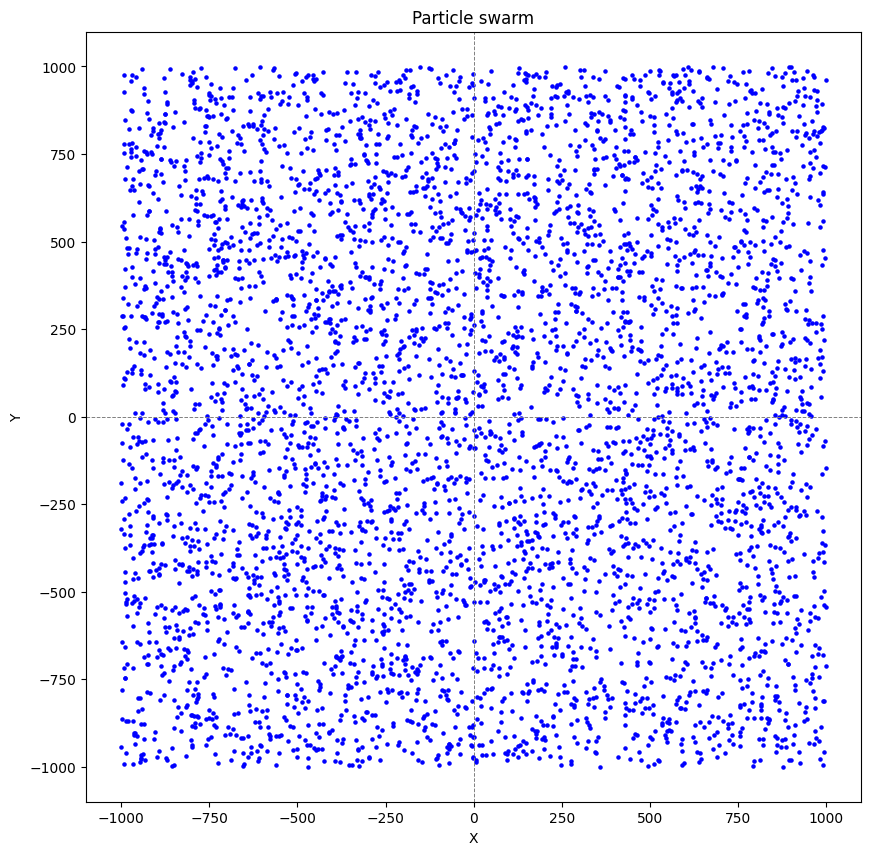

In [133]:
x = [particle.position[0] for particle in particles]
y = [particle.position[1] for particle in particles]

plot(x, y)

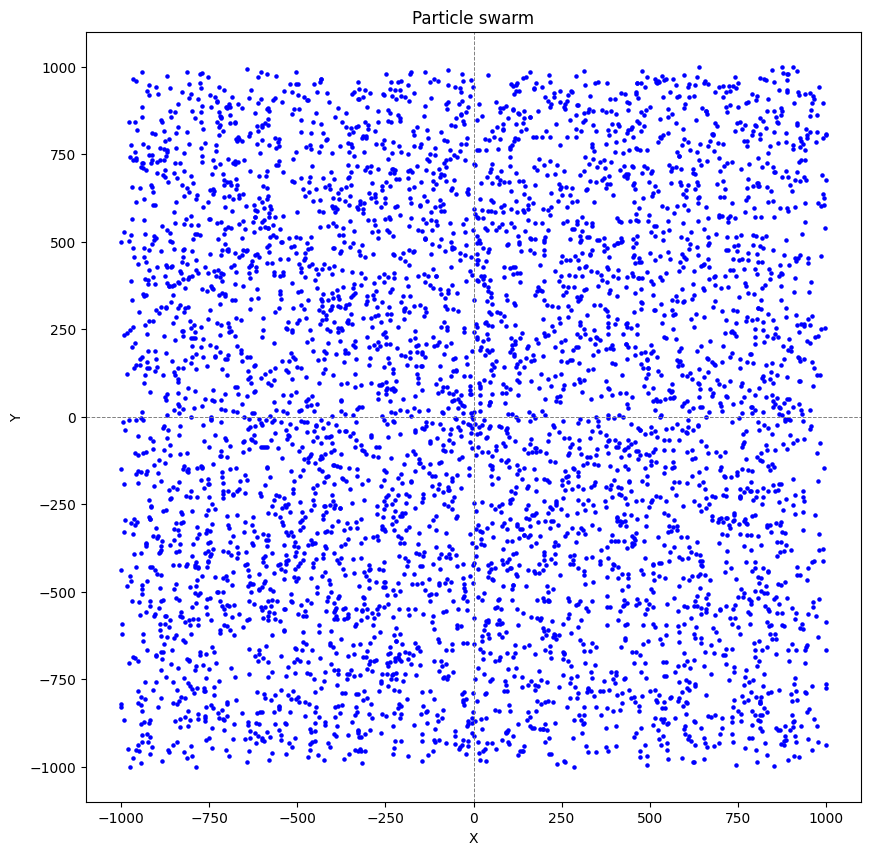

In [134]:
iterate_particles(particles, 50)

x = [particle.position[0] for particle in particles]
y = [particle.position[1] for particle in particles]

plot(x, y)

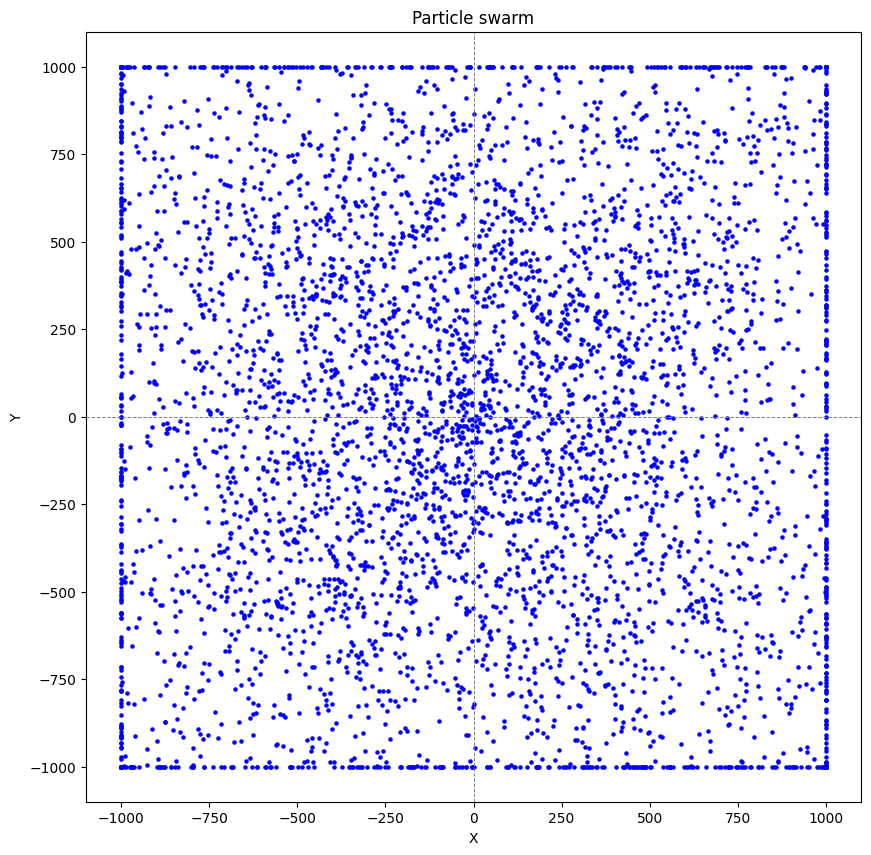

In [135]:
iterate_particles(particles, 450)

x = [particle.position[0] for particle in particles]
y = [particle.position[1] for particle in particles]

plot(x, y)

In the above visualizations we can see how the particle distribution evolves over time, using just the 
personal best fitness. 

In the first example, the particles are randomly distributed. 
In the second plot, it's hard to see, but the particles seem to be moving away from the edges. In the the third plot (500 loops), we can see that the particles are having a strong preference for clustering at the edges of the search space, and the center. 
The center is expected, as it's the goal of the objective function, but the edges are not. This behavior seems to be caused by a too large velocity value.